In [7]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def f(x):
    return x*(x-1.5)

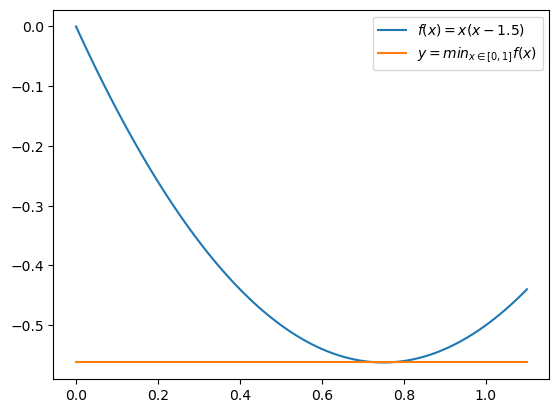

In [55]:
X = np.linspace(0, 1.1, 100)
Y = f(X)
c = [f(3/4)]*len(X)
plt.plot(X,Y, label = '$f(x) = x(x-1.5)$')
plt.plot(X,c, label = '$y = min_{x\in [0,1]} f(x)$')
plt.legend()
plt.show()

# Searcch with fixed step size

In [103]:
def S_W_F_S_S(f, x_init = 0 ,step = 0.05):
    i = 1
    data ={
        'c' : ['r'],
        'x_i' : ['$x_{'+str(i) +'}$'],
        'x':[x_init],
        'f(x)' : [f(x_init)]
    }
    f_2 = f(x_init+step)
    if f_2 < data['f(x)'][-1] :
        x_init = x_init + step
        i = i+1
        data['c'].append('r')
        data['x_i'].append('$x_{'+str(i) +'}$')
        data['x'].append(x_init)
        data['f(x)'].append(f(x_init))
        while True :
            f_ = f(x_init+step)
            if f_ < data['f(x)'][-1] :
                x_init = x_init + step
                i = i+1
                data['c'].append('r')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
            else :
                x_init = x_init + step
                i = i+1
                data['c'][-2] = 'b'
                data['c'].append('b')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
                return (x_init - 2*step, x_init), data
    elif data['f(x)'][-1] < f_2 :
        x_init = x_init - step
        i = i+1
        data['c'].append('r')
        data['x_i'].append('$x_{'+str(i) +'}$')
        data['x'].append(x_init)
        data['f(x)'].append(f(x_init))
        while True :
            f_ = f(x_init-step)
            if data['f(x)'][-1] > f_ :
                x_init = x_init - step
                i = i+1
                data['c'].append('r')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
            else :
                x_init = x_init - step
                i = i+1
                data['c'][-2] = 'b'
                data['c'].append('b')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
                return ( x_init, x_init + 2*step), data
    else :
        return (x_init - step,x_init + step), 0
            
    

In [104]:
intirval_of_min , data = S_W_F_S_S(f, 0, 0.05)

In [106]:
pd.DataFrame(data)

,c,x_i,x,f(x)
0,r,$x_{1}$,0.00,-0.0000
1,r,$x_{2}$,0.05,-0.0725
2,r,$x_{3}$,0.10,-0.1400
3,r,$x_{4}$,0.15,-0.2025
4,r,$x_{5}$,0.20,-0.2600
5,r,$x_{6}$,0.25,-0.3125
6,r,$x_{7}$,0.30,-0.3600
7,r,$x_{8}$,0.35,-0.4025
8,r,$x_{9}$,0.40,-0.4400
9,r,$x_{10}$,0.45,-0.4725


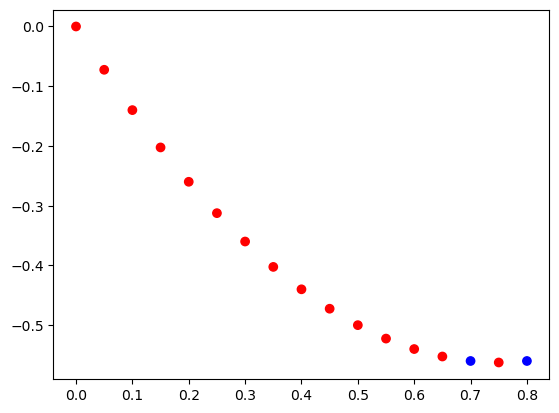

In [107]:
plt.scatter(data['x'],data['f(x)'],c = data['c'])
plt.show()

In [108]:
intirval_of_min

(0.7000000000000002, 0.8000000000000002)

# Search with accelerated step size

In [164]:
def S_W_A_S_S(f, x_init = 0, step = 0.001):
    i = 1
    data ={
        'c' : ['r'],
        'step value' : ['-'],
        'x_i' : ['$x_{'+str(i) +'}$'],
        'x':[x_init],
        'f(x)' : [f(x_init)]
    }
    f_2 = f(x_init+step)
    
    if f_2 < data['f(x)'][-1] :
        x_init = x_init + step
        i = i+1
        data['step value'].append(step)
        data['c'].append('r')
        data['x_i'].append('$x_{'+str(i) +'}$')
        data['x'].append(x_init)
        data['f(x)'].append(f(x_init))
        while True :
            f_ = f(x_init+step)
            if f_ < data['f(x)'][-1] :
                x_init = x_init + step
                i = i+1
                step = 2*step
                data['step value'].append(step)
                data['c'].append('r')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
            else :
                x_init = x_init + step
                i = i+1
                step = 2*step
                data['step value'].append(step)
                data['c'][-2] = 'b'
                data['c'].append('b')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
                return (x_init - step/4 -step/2, x_init), data
    elif data['f(x)'][-1] < f_2 :
        x_init = x_init - step
        i = i+1
        data['step value'].append(step)
        data['c'].append('r')
        data['x_i'].append('$x_{'+str(i) +'}$')
        data['x'].append(x_init)
        data['f(x)'].append(f(x_init))
        while True :
            f_ = f(x_init-step)
            if data['f(x)'][-1] > f_ :
                x_init = x_init - step
                i = i+1
                step = 2*step
                data['step value'].append(step)
                data['c'].append('r')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
            else :
                x_init = x_init - step
                i = i+1
                #step = 2*step
                data['step value'].append(2*step)
                data['c'][-2] = 'b'
                data['c'].append('b')
                data['x_i'].append('$x_{'+str(i) +'}$')
                data['x'].append(x_init)
                data['f(x)'].append(f(x_init))
                return ( x_init, x_init + 3/2*step), data
    else :
        return (x_init - step,x_init + step), 0

In [178]:
intirval_of_min , data = S_W_A_S_S(f, 1, 0.02)

In [166]:
pd.DataFrame(data)

,c,step value,x_i,x,f(x)
0,r,-,$x_{1}$,1.00,-0.5000
1,r,0.02,$x_{2}$,0.98,-0.5096
2,r,0.04,$x_{3}$,0.96,-0.5184
3,r,0.08,$x_{4}$,0.92,-0.5336
4,b,0.16,$x_{5}$,0.84,-0.5544
5,r,0.32,$x_{6}$,0.68,-0.5576
6,b,0.64,$x_{7}$,0.36,-0.4104


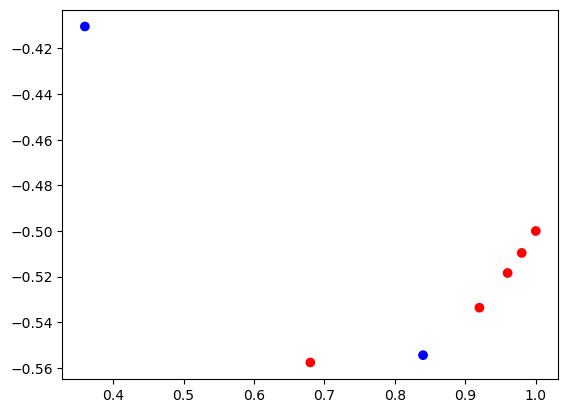

In [167]:
plt.scatter(data['x'],data['f(x)'],c = data['c'])
plt.show()

In [168]:
intirval_of_min

(0.35999999999999993, 0.8399999999999999)

# Exhaustive search method

In [21]:
def E_S_M(f, x_init, x_final, n = 10):
    intirval_of_min , data = S_W_F_S_S(f, x_init  ,step = (x_final - x_init)/(n+1))
    intirval_of_min = list(intirval_of_min)
    intirval_of_min[1] = intirval_of_min[1] - (x_final - x_init)/(n+1)
    return tuple(intirval_of_min), data

In [22]:
intirval_of_min , data = E_S_M(f,0.0, 1.0, 9)

In [23]:
pd.DataFrame(data)

,c,x_i,x,f(x)
0,r,$x_{1}$,0.0,-0.00
1,r,$x_{2}$,0.1,-0.14
2,r,$x_{3}$,0.2,-0.26
3,r,$x_{4}$,0.3,-0.36
4,r,$x_{5}$,0.4,-0.44
5,r,$x_{6}$,0.5,-0.50
6,r,$x_{7}$,0.6,-0.54
7,b,$x_{8}$,0.7,-0.56
8,r,$x_{9}$,0.8,-0.56
9,b,$x_{10}$,0.9,-0.54


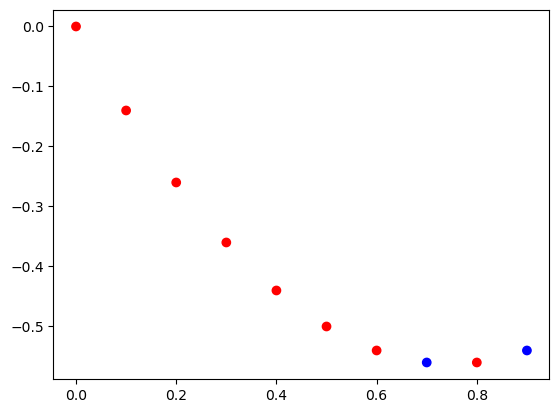

In [24]:
plt.scatter(data['x'],data['f(x)'],c = data['c'])
plt.show()

In [25]:
intirval_of_min

(0.7, 0.7999999999999999)

# Dichotomous search method

In [96]:
def D_S_M(f,x_l, x_u , delta, eps = 1e-4, max_iter = 1000):
    data = {
        'x_l' : [x_l],
        'x_u' : [x_u],
        'f(x_l)' : [f(x_l)],
        'f(x_u)' : [f(x_u)],
        'l_l' : [x_u - x_l],
        'l_u' : [x_u - x_l],
        'iter_l' : [0],
        'iter_u' : [0]
           }
    iter_ = 0
    l = x_u - x_l
    while l > eps and iter_ < max_iter :
        l = x_u - x_l
        xc = (x_u + x_l)/2
        x1 = xc - delta/2
        x2 = xc + delta/2
        fx1 = f(x1)
        fx2 = f(x2)
        if fx1 < fx2 :
            x_u = x2
            data['x_u'].append(x_u)
            data['l_u'].append(x_u - x_l)
            data['f(x_u)'].append(fx2)
            data['iter_u'].append(iter_+1)
        elif fx1 > fx2 :
            x_l = x1
            data['x_l'].append(x_l)
            data['l_l'].append(x_u - x_l)
            data['f(x_l)'].append(fx1)
            data['iter_l'].append(iter_+1)
        else :
            x_u = x2
            x_l = x1
            data['x_u'].append(x_u)
            data['f(x_u)'].append(fx2)
            data['x_l'].append(x_l)
            data['f(x_l)'].append(fx1)
            data['l_l'].append(x_u - x_l)
            data['l_u'].append(x_u - x_l)
            data['iter_l'].append(iter_+1)
            data['iter_u'].append(iter_+1)
        iter_ = iter_ + 1
    return x_l, x_u, data

In [97]:
x_l, x_u, data = D_S_M(f,0.0, 1.0, 0.001, max_iter = 100) 

In [98]:
x_l, x_u

(0.7494999999999964, 0.7504999999999963)

In [101]:
size_l = [2*i + 10 for i in  data['iter_l']]
size_u = [i + 10 for i in  data['iter_u']]

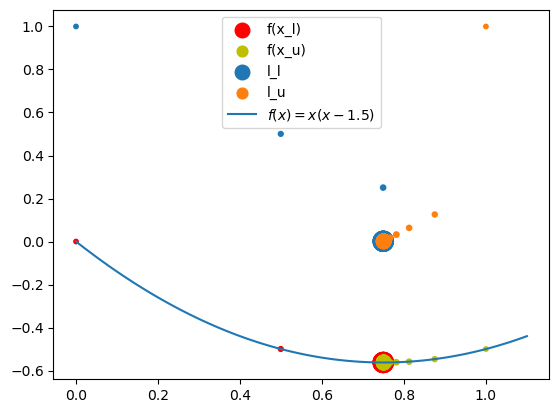

In [102]:
plt.scatter(data['x_l'],data['f(x_l)'],c= 'r', s = size_l, label = 'f(x_l)')
plt.scatter(data['x_u'],data['f(x_u)'],c = 'y',s = size_u, label = 'f(x_u)')
plt.scatter(data['x_l'],data['l_l'],s = size_l , label = 'l_l')
plt.scatter(data['x_u'],data['l_u'],s = size_u, label = 'l_u')
plt.plot(X,Y, label = '$f(x) = x(x-1.5)$')
plt.legend()
plt.show()

#  Interval halving method

In [42]:
def I_H_M(f,x_l, x_u, eps = 1e-4, max_iter = 1000):
    data = {
        'x_l' : [x_l],
        'x_u' : [x_u],
        'f(x_l)' : [f(x_l)],
        'f(x_u)' : [f(x_u)],
        'l_l' : [x_u - x_l],
        'l_u' : [x_u - x_l],
        'iter_l' : [0],
        'iter_u' : [0]
           }
    iter_ = 0
    l = x_u - x_l
    while l > eps and iter_ < max_iter :
        l = x_u - x_l
        x0 = (x_u + x_l)/2
        x1 = x0 - l/4
        x2 = x0 + l/4
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)
        if fx1 <fx0 < fx2 :
            x_u = x0
            data['x_u'].append(x_u)
            data['l_u'].append(x_u - x_l)
            data['f(x_u)'].append(fx0)
            data['iter_u'].append(iter_+1)
        elif fx1 > fx0> fx2 :
            x_l = x0
            data['x_l'].append(x_l)
            data['l_l'].append(x_u - x_l)
            data['f(x_l)'].append(fx0)
            data['iter_l'].append(iter_+1)
        elif fx0 < fx1 and fx0 < fx2 :
            x_u = x2
            x_l = x1
            data['x_u'].append(x_u)
            data['f(x_u)'].append(fx0)
            data['x_l'].append(x_l)
            data['f(x_l)'].append(fx0)
            data['l_l'].append(x_u - x_l)
            data['l_u'].append(x_u - x_l)
            data['iter_l'].append(iter_+1)
            data['iter_u'].append(iter_+1)            
        iter_ = iter_ + 1
        
    return x_l, x_u, iter_, data

In [43]:
x_l, x_u, iter_, data = I_H_M(f,0.0, 1.0, 0.00001, max_iter = 100) 

In [44]:
x_l, x_u, iter_

(0.7499980926513672, 0.7500019073486328, 18)

In [62]:
size_l = [2*i + 10 for i in  data['iter_l']]
size_u = [2*i + 10 for i in  data['iter_u']]

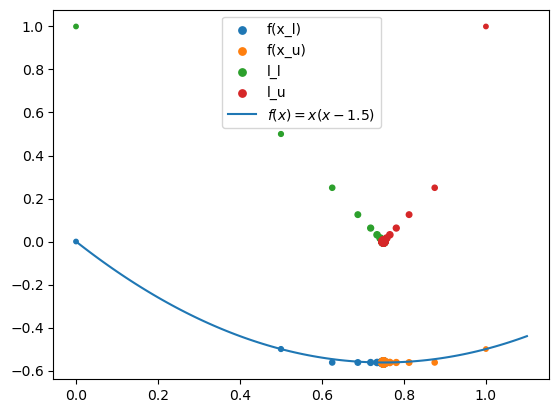

In [63]:
plt.scatter(data['x_l'],data['f(x_l)'],s = size_l, label = 'f(x_l)')
plt.scatter(data['x_u'],data['f(x_u)'],s = size_u, label = 'f(x_u)')
plt.scatter(data['x_l'],data['l_l'],s = size_l , label = 'l_l')
plt.scatter(data['x_u'],data['l_u'],s = size_u, label = 'l_u')
plt.plot(X,Y, label = '$f(x) = x(x-1.5)$')
plt.legend()
plt.show()

#  Fibonacci method

In [66]:
def fib(n):
    f0 = 1
    f1 = 1
    f =0
    for i in range(2, n+1):
        f = f0 + f1
        f0 = f1
        f1 = f
    return f1

In [76]:
def Fib_M(f, x_l, x_u, n):
    data = {
        'x_l' : [x_l],
        'x_u' : [x_u],
        'f(x_l)' : [f(x_l)],
        'f(x_u)' : [f(x_u)],
        'l_l' : [x_u - x_l],
        'l_u' : [x_u - x_l],
        'iter_l' : [0],
        'iter_u' : [0]
           }
    iter_ = 0
    l = x_u - x_l
    x1 = x_l + (fib(n-2)/ fib(n))*l
    x2 = x_l + (fib(n-1)/ fib(n))*l
    while n>1 :
        n = n - 1
        f1 = f(x1)
        f2 = f(x2)
        if f1 < f2 :
            x_u = x2
            data['x_u'].append(x_u)
            data['l_u'].append(x_u - x_l)
            data['f(x_u)'].append(f2)
            data['iter_u'].append(iter_+1)
            l = x_u - x_l
            x2 = x1
            x1 = x_l + (fib(n-2)/ fib(n))*l
            f2 = f1
            f1 = f(x1)
            
        elif f1 > f2 :
            x_l = x1
            data['x_l'].append(x_l)
            data['l_l'].append(x_u - x_l)
            data['f(x_l)'].append(f1)
            data['iter_l'].append(iter_+1)
            l = x_u - x_l
            x1 = x2
            f1 = f2
            x2 = x_l + (fib(n-1)/ fib(n))*l
            f2 = f(x2)
        iter_ = iter_ + 1
    return x_l , x_u , data

In [77]:
x_l , x_u , data = Fib_M(f, .0, 1.0, 70)

In [78]:
x_l , x_u

(0.7499999889761606, 0.7500000074883297)

In [81]:
size_l = [2*i + 10 for i in  data['iter_l']]
size_u = [2*i + 10 for i in  data['iter_u']]

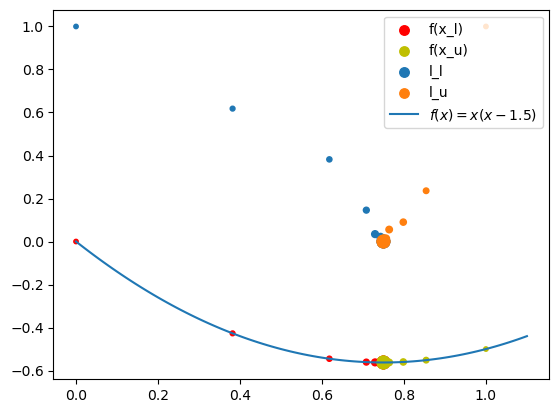

In [88]:
plt.scatter(data['x_l'],data['f(x_l)'],c= 'r', s = size_l, label = 'f(x_l)')
plt.scatter(data['x_u'],data['f(x_u)'],c = 'y',s = size_u, label = 'f(x_u)')
plt.scatter(data['x_l'],data['l_l'],s = size_l , label = 'l_l')
plt.scatter(data['x_u'],data['l_u'],s = size_u, label = 'l_u')
plt.plot(X,Y, label = '$f(x) = x(x-1.5)$')
plt.legend()
plt.show()

# Golden section method

In [89]:
def golden_Section(f, x_l, x_u, eps):
    """
    parameter :
            x_l = lower bound
            x_u = Upper bound
            eps = 
            f = Objective Function
    return :
            x_l = Lower bound given by Fibonacci method
            x_u = Upper bound given by Fibonacci method
            l = long of the interval of uncertainty before Termination
    """
    data = {
        'x_l' : [x_l],
        'x_u' : [x_u],
        'f(x_l)' : [f(x_l)],
        'f(x_u)' : [f(x_u)],
        'l_l' : [x_u - x_l],
        'l_u' : [x_u - x_l],
        'iter_l' : [0],
        'iter_u' : [0]
           }
    iter_ = 0
    phi = 2/( 1 + math.sqrt(5) ) 
    l = x_u - x_l
    x1 = x_l + (phi**2)*l
    x2 = x_l + phi*l
    f1 = f(x1)
    f2 = f(x2)
    while l > eps :
        if f1 < f2 :
            x_u = x2
            data['x_u'].append(x_u)
            data['l_u'].append(x_u - x_l)
            data['f(x_u)'].append(f2)
            data['iter_u'].append(iter_+1)
            l = x_u - x_l
            x2 = x1
            x1 = x_l + (phi**2)*l
            f2 = f1
            f1 = f(x1)
        elif f1 > f2 :
            x_l = x1
            data['x_l'].append(x_l)
            data['l_l'].append(x_u - x_l)
            data['f(x_l)'].append(f1)
            data['iter_l'].append(iter_+1)
            l = x_u - x_l
            x1 = x2
            f1 = f2
            x2 = x_l + phi*l
            f2 = f(x2)
    return x_l , x_u , data

In [90]:
x_l , x_u , data = golden_Section(f, .0, 1.4, 1e-6)

In [91]:
x_l , x_u 

(0.749999729757084, 0.7500004822437838)

In [92]:
size_l = [2*i + 10 for i in  data['iter_l']]
size_u = [2*i + 10 for i in  data['iter_u']]

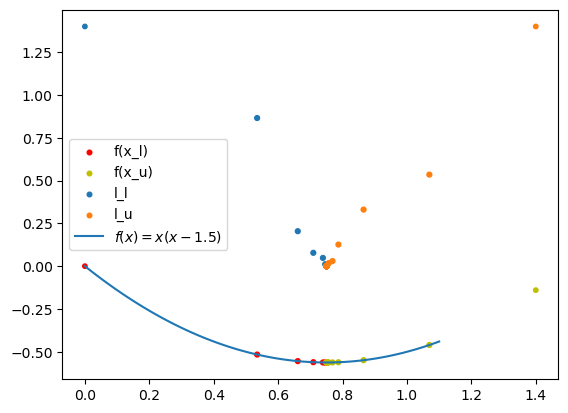

In [93]:
plt.scatter(data['x_l'],data['f(x_l)'],c= 'r', s = size_l, label = 'f(x_l)')
plt.scatter(data['x_u'],data['f(x_u)'],c = 'y',s = size_u, label = 'f(x_u)')
plt.scatter(data['x_l'],data['l_l'],s = size_l , label = 'l_l')
plt.scatter(data['x_u'],data['l_u'],s = size_u, label = 'l_u')
plt.plot(X,Y, label = '$f(x) = x(x-1.5)$')
plt.legend()
plt.show()